In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('../data/processed_data_with_anomaly.csv')

In [5]:
features = ['Lag_1_Status', 'Count_Alpa_30D', 'Avg_Arrival_Time_7D', 'DayOfWeek']
le = LabelEncoder()

X = df[features]
# Encode 'Lag_1_Status' in the features
X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))

y = le.fit_transform(df['note'].astype(str))

C:\Users\hadid\AppData\Local\Temp\ipykernel_39352\3180042900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))


In [6]:
# 80% train-test split

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Data Latih: {X_train.shape[0]} baris")
print(f"Data Uji: {X_test.shape[0]} baris")

Data Latih: 101904 baris
Data Uji: 25476 baris


In [7]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [8]:
model_rf = RandomForestClassifier(random_state=42, max_depth=7, max_features=3, min_samples_split=5, n_estimators=50)

In [9]:
model_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=7, max_features=3, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [10]:
y_pred = model_rf.predict(X_test)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68     16819
           1       0.52      0.54      0.53      7735
           2       0.06      0.26      0.10       922

    accuracy                           0.58     25476
   macro avg       0.45      0.47      0.44     25476
weighted avg       0.67      0.58      0.62     25476


Confusion Matrix for Random Forest:


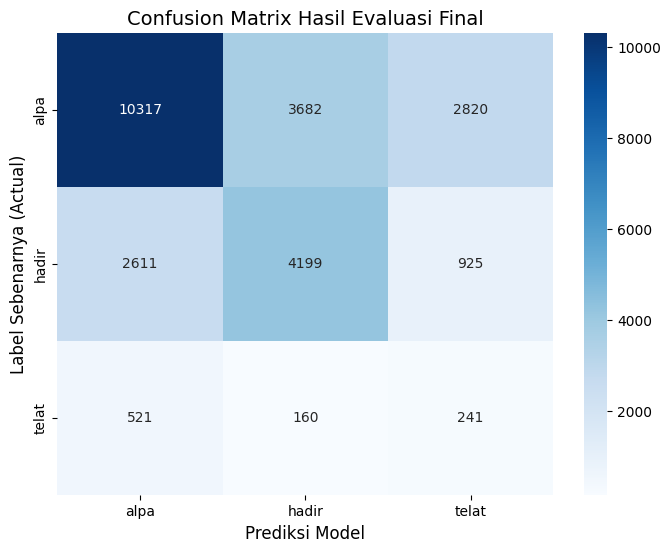

In [11]:
# Print classification report
print(f"\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for Random Forest:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
              xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Actual)', fontsize=12)
plt.title('Confusion Matrix Hasil Evaluasi Final', fontsize=14)
plt.show()